### **Having fun with two qubits!!**

Before starting to play with two qubits, let's have a look to Hadamard gate:

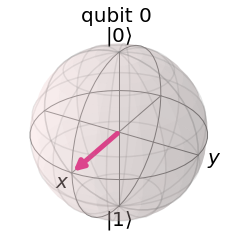

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# create quantum circuit
qc = QuantumCircuit(1)

qc.h(0)                                # add h(qubit)

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()                  # we want to use statevector later
qobj = assemble(qc)
result = sim.run(qobj).result()         # run circuit, get results
final_state = result.get_statevector()  # get the final state from the result

# visualize
plot_bloch_multivector(final_state)     # display final state directly on Bloch sphere

A nice code to run using two qubits is an entanglement experiment. To do so, we have to introduce the **CNOT gate**:

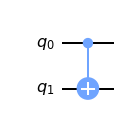

In [3]:
qc = QuantumCircuit(2)
qc.cx(0,1)               # First element is the control qubit, second element the target (the affected)
qc.draw("mpl")

In the example, q0 is the **control qubit** and q1 the **target qubit**. If q0 is |1>, q1 will be set to |1>. 

Now let's do the entanglement experiment. We first need to apply a hadamard gate to the first qubit, and later join both qubit using the CNOT gate.

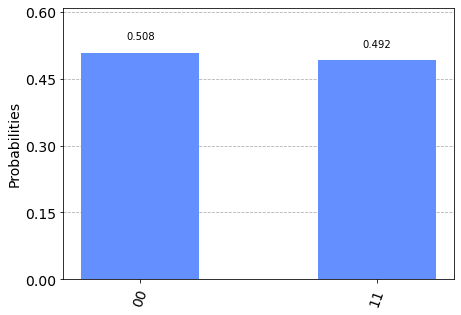

In [7]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

# create quantum circuit
qc = QuantumCircuit(2)

qc.h(0)                          # apply a Hadamard gate to the first qubit
qc.cx(0,1)                       # 

qc.measure_all()                 # finally measure all

# run
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = sim.run(qobj, shots=1024).result()  # run circuit, get results

# output statistics
counts = result.get_counts()     # extract statistics from results
plot_histogram(counts)

Change the number of shots from 1024 to 100, 10000 or 5, for example. See how probabilities are closer to 50%-50% as the number of shots increase.

Now join all your knowledge of quantum gates to play with them. You can also combine one-qubit gates one after the other. Use the following code as sandbox:

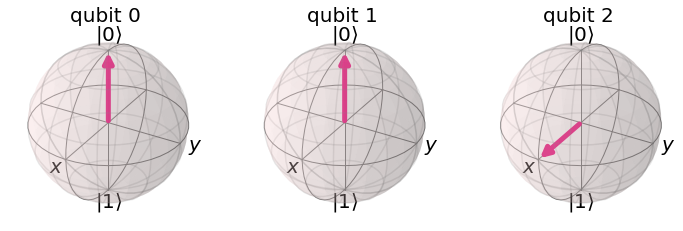

In [9]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# create quantum circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.z(1)
qc.h(0)                         
qc.h(2)                     

# run
sim = Aer.get_backend('aer_simulator')
qc.save_statevector() 
qobj = assemble(qc)
result = sim.run(qobj, shots=100).result()  # run circuit, get results

# get state
final_state = result.get_statevector()

# visualize
plot_bloch_multivector(final_state)     # display final state directly on Bloch sphere